# Working with linear regressions in Python

In module 1, we used Python to plot some density data and calculate the equation of a best fit straight line! However, we'd like to be able to do some more sophisticated error analysis when using linear regressions. Today we're going to work with some sample data and some real data from Module 1, in order to find out how scatter in a calibration curve affects the uncertainty in the numbers that we get when using that calibration curve to determine the concentration of an unknown solution.

Let's say that we have sample absorbance data collected for the following known concentrations:
	Blank,	5.0 mM,	10.0 mM,	15.0 mM,	20.0 mM,	25.0 mM

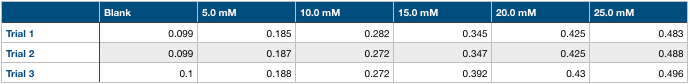
  
We also measured an unknown solution which produced the following absorbance values:

* 0.406
* 0.408
* 0.407
* blank = 0.098
        
      
Summarize <b>in this markdown cell</b> what you need to do to turn this data into a useful calibration curve to determine the concentration of the unknown. (Double click to open it for editing, and press "Run" when you are done!)  For example, how are you going to handle the fact that we have multiple measurements for each standard solution?)









After your group has summarized a plan, move on to the code.

## Import sample data

In [ ]:
# import a number of extra packages into python. These are the ones we will need today:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# The sample data shown above is contained in a file called "drylabdata.csv".  Import this data into Python as a 2-D array 
# called data.  dtype=float, comma delimited, names=None


# Print it to make sure the import was successful
 
    


Note the data structure here; each row (first index) is a trial, each column (2nd index) is a different standard. 
## Add concentration, mean, and std dev for each standard

To make this data array more useful, we are going to copy it and then expand the number of rows so that we can add concentration values and statistical summaries of the absorbance measurements for each of the six standards.  Then, we'll use indexes to call data from the column and row numbers that we need.  But remember, Python always counts from zero!

In [ ]:
# Sample code to call just the first row of numbers, and placing them in a 1-D list called "trial_1"
# trial_1 = data[0,:]

# Sample code to calculate the mean and sample std dev of the absorbance values of the blank sample:
# blank_mean = np.mean(data[:,0])
# blank_stdev = np.std(data[:,0], ddof=1)

# So that we don't overwrite our original array "data," we'll make a larger array called "datasummary" that is
# organized in the same way -- samples in columns, and concentrations and statistical summaries in different rows,
# after the raw data.  

# Declare an empty array called "datasummary" with 7 rows and 6 columns.


# Here is sample code for copying, point by point, all the data in "data" into the first three rows of "datasummary".  The row must have the same number of elements as the width
# The first FOR loop steps through each row, while the nested FOR loop steps through each column within the row.
for i in range(0,len(data)):
    for j in range(0,len(data[0])):
        datasummary[i,j]=data[i,j]

# The first row we want to add will hold the concentrations of the standards, which are shown in the table at the 
# top of this notebook.  Blank = 0 concentration.  Declare a list of these six concentrations:  
concs=

# Now add this list as the 4th row of datasummary (but use index counting from zero)


# Complete the code to use a FOR loop to step across each column of "data" and calculate the mean and standard 
# deviation (with ddof=1).  Place the mean in the 5th row and the std dev in the 6th row of "datasummary".
for j in range (0,6):
    datasummary[4,j]=np.mean(data[:,j])
    datasummary

# print to check your work.  Make sure you have an average and std dev calculated for every column of data!  


The last row of the "datasummary" array (row index = 6) hasn't been used yet.  Currently, it should contain numbers near zero. 

At this point, I recommend a quick pause to write down a list of what type of data you've placed in each row, because you will be calling by row indexes repeatedly in the next code cells.  For example, "rows 0 - 2 contain raw data.  Row 3 contains concentrations ..."  This list will make the rest of our coding today much easier!

## Plotting a standard curve when replicate data was collected

Now that you have the concentrations and average absorbances for each standard in the datasummary array, let's create a plot from the data.  Since you also have the standard deviations of the absorbance measurements for each standard, we will be able to add error bars to the plot!

In [ ]:
# Add code to make a plot of average absorbance (y-axis) vs. concentration (x).
# Recall that in the 'plot' command, the x axis data comes first, then y, then 'ro' plots the points as red circles. 
# Use indexing to pull the correct data out of the "datasummary" array.


# Add labels on the x and y axis, always including units.  Add a title.



# Here is code to add error bars to the plot
plt.errorbar(datasummary[3,:], datasummary[4,:], yerr = datasummary[5,:], xerr = None, fmt = 'b.')


After hitting Run once (or twice), you should see a figure above with six red dots almost in a straight line, and blue error bars.  You may see only one error bar, because that is the only one that is larger than the size of the red circles used to plot the data!  

## Calculating 95% confidence intervals
It is best to use confidence intervals for error bars, rather than standard deviations.  Plus, they are often larger and easier to see!  Remember, we just need to multiply our standard deviation by a Student's t constant, and divide by the square root of n.  We'll place these values into the 7th row (row index = 6) of the "datasummary" array.
 
 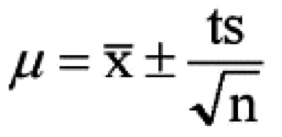

In [ ]:
# Use alpha to set the confidence level you want (Confidence level = 1 - alpha)
alpha = 0.05

# have you seen any command that might give you n without you having to input a number? 
# ...to make your code more general for different data sets?
n = 

# Here is the correct code to get the correct t value.  !!!Note that there was an error in Dr. D's Module 1 code 
# for this!
t = stats.t.ppf(1-alpha/2, n-1)
print(t)

# Now add code to use a FOR loop to calculate across the columns and convert each std dev into a confidence interval



# Last, add the plotting code back in, but use the new error bars



# Save the figure



Since the confidence intervals are larger than the standard deviations, you should be able to see a few more of them in the plot!  Save this plot for upload into LabArchives.

## External Calibration Curve
This type of plot is called an <b> external calibration curve </b> in analytical chemistry, because we can take some other (external) unknown solution, measure its absorbance, and use this plot to determine that unknown sample's concentration using the equation of the linear regression, plugging in absorption as y and solving for x.

You've done linear regressions before in Python, so let's adapt your old code!

In [ ]:
# Add code to calculate the linear regression of absorbance (y) vs. concentration (x).  You will have to use indexing
# to pull these numbers out of our 2-D datasummary array, as before.




# Complete a print statement for the equation of the line (y = mx + b), with computed values for m and b
print ('the equation of the line is y = ' + 


## Adding the 'best fit line' to your graph

Now for the new part!  It's always a nice reality check to see the line plotted along with your data. In this case, we can think about this line as a model to help us make a prediction about our data. So we can plug in our concentration values, and plot the y values that our y = mx + b model predicts, and see how well it matches the real data.

In [ ]:
# Generate a predicted model of absorbance based on our regression equation.  Just add concentration values from the 
# array as "x"
predict_y = (datasummary[3,:]*m)+b

# Plot the predicted data (note if we don't ask for a specific marker style, we'll just get a line)
plt.plot(datasummary[3,:],predict_y)

#add the real data, error bars, axis label, and title to the plot, just like we did before:






Once you have the straight line, the data, the conf. interval error bars, axis labels, and a title, save the graph and upload into LabArchives.  This graph should be the "gold standard" -- even better than the previous two!

## Solve for your unknown

The absorbance values measured for an unknown are listed near the top of this Juypter notebook.  Using the linear regression equation you printed out earlier, calculate the concentration of the unknown by hand first.  Then complete the code below to calculate the unknown concentration using Python. Make sure your hand-written calculation and your python code are producing the same result!

In [ ]:
# Add the absorbance measurements of the unknown here, as an array:
unknown = 

# Calculate the mean and sample standard deviation of the absorbance values for the unknown sample using 
# numpy functions.  (Don't forget to define ddof.)
unknown_av = 

unknown_std = 

# now using slope, intercept, and the average absorbance of the unknown, solve for unknown_concentration
unknown_concentration = 

# Print the results, with units



Do your values match what you calculated by hand? If not, check your code!

## Uncertainty in a linear regression

We have an $R^{2}$ value which gives us an idea how well our predicted line is able to fit our real data, but it's hard to turn that value into a real uncertainty value on our unknown calcultion. Ideally, we'd like an uncertainty in the same units are our final answer here (so in this case, in mM). In order to do that, we need to think about what error actually means in a linear regression.

In a linear regression, the line comes as close as possible to all the points, but can't usually hit them all.  There are uncertainties in the slope and intercept values produced. For whatever reason, the scipy.stats linear regression package just returns the error in the slope.  This is useful if your main goal is to use a linear regression to determine a relationship between your variables, or measure a rate constant.  In this case, we really need the error in the y values being predicted. That is the value we can transform into an x value error, or the errror in the concentration that we get for the unknown!

Think about what error on the y-value means. The linear regression made a prediction of where each datapoint ought to be, so our questions is: how close are those predictions to the real data, in a vertical direction?  And what is the standard deviation of these vertical differences?

First, we'll devine the difference of each measured y value ($y_{i}$) from the predicted y value (where $ y= mx+b $):

$$ d_{i} = y_{i} - (m x_{i} + b) $$

Then we want to compile those differences for every point we have available, to turn them into an overall assessment of the standard deviation of the vertical differences.  You should not be surprised that we will square them, add them together, and then take the square root as part of the calculation.  That's how errors combine:

$$ s_{y}={\sqrt {\frac {\sum (d_{i})^{2}}{n-2}}} $$

This is very close to the standard deviation of the differences, but the degrees of freedom is different from the usual standard deviation equation, because both a slope and an intercept have been determined -- we don't learn anything about the errors in the fit until we have <i>more than 2</i> data points in our graph.

In [ ]:
# Manually calculate error in y.  Sadly, standard error in most python packages is the error in the slope, 
# rather than error in the y-predicitions of the model.  sy would have been more useful to us!

# Initialize the sum variable at zero
sum_square = 0

# Define the number of replicates !!
k =

# Here, for each point on the graph, we're plugging in concentration, and comparing the predicted absorbance  
# calculated using the linear regression equation to the actual measured absorbance.  

for j in range (0,len(datasummary[0])):
    sum_square = sum_square + ((datasummary[4,j]-(m*datasummary[3,j])-b)**2)
    
    
y_err = np.sqrt(sum_square/(k-2))

# Complete the print statement
print ("the y error predicted by this linear regression model is " + 


y_err should roughly match the amount by which some of the points on the graph miss the linear regression line in the vertical direction.  Use this as an order-of-magnitude check that your calculation is correct.

### Standard error in the intercept

Since the linear regression command in the stats module gives us the uncertainty in the slope, and we just calculated the uncertainty in the y values, we can take a shortcut to the uncertainty in the intercept, which avoids having to actually do any matrix math here. Note that

$$ u_{m}^{2} = \frac{s_{y}^{2}n}{D} $$

Can be rewritten as $$ D = \frac{s_{y}^{2}n}{u_{m}^{2}} $$

So that we can write $ u_{b}^{2} $ in terms of values we have already calculated!
$$ u_{b}^{2} = \frac{s_{y}^{2}\sum{x_{i}^{2}}}{D} = \frac{\sum{x_{i}^{2}}u_{m}^{2}}{n} $$

Remember that the x values are just the concentrations of each standard, and u_m is the uncertainty in the slope.  Once you have the uncertainties in the slope and the intercept calculated, be sure to write the equation of the line, with full uncertainty, in your lab notebook when you report your final results!


In [ ]:
u_b = np.sqrt((sum(datasummary[3,:]**2)*(sm**2))/len(datasummary[0]))

print("error in the slope is " + str(sm))
print("error in the intercept is " + str(u_b))



### Convert a y value into an uncertainty on our calculated x value

Now we have all of the information we need to propogate error through the calibration curve to find the uncertainty in the final result. We can use equation 4-27 in your textbook for this:

$$ s_{x}= \frac{s_{y}}{\mid{m}\mid}{\sqrt {\frac {1}{k} + \frac {1}{n} + \frac {(y-\bar{y})^{2}}{m^{2}\sum (x_{i}-\bar{x})^{2}}}} $$

You now have all of these variables:  m is the slope, k is the number of replicate measurements in your unknown, n is the number of points in your calibration curve, and x is all of your calibration curve x values, either individually ($ x_{i} $) or the average of those values $ (\bar{x} ) $.  $\bar{y}$ is the average of all of the y values in your calibration curve, and y is the signal for the unknown you measured -- absorbance in this case. Note that this means that the closer your measured unknown is to the center of your calibration curve, the smaller that the uncertainty in the result will be!

Now we have to set up some math to make this happen. I'd strongly suggest breaking it down into components!

In [ ]:
# first, calculate s_y/m

var1 = y_err/m
print (var1)

# then, lets get all of the pieces inside the square root

# here we're using the length command to just check how many rows are in our "unknown" array, since that is equal to 
# the number of replicate measurements of the unknown. The length of a row in "datasummary" is equal to the number
# of points in the calibration curve!
inv_k = 1/len(unknown)
inv_n = 1/len(datasummary[0])

# now let's get the two averages:  average absorbances, and average concentrations of the 6 standards
y_bar = np.mean(datasummary[4,:])
x_bar = 

# We'll need a loop to handle the sum
# ss is where we'll save the sum of squares, so we'll set it initially to zero
ss = 0

# you'll need a FOR loop to compute the sum, like you've seen before, going through each column
# Can you complete the FOR loop? 
for i 
    ss = ss +               # complete the expression. Think about how you will call individual x values
    print(ss)


# now calculate the whole last component

var4 = ((unknown_av-y_bar)**2)/((m**2)*ss)


# and put it all together to get the final result
s_x =  var1*np.sqrt(inv_k+inv_n+var4)

# print out your final result (concentration of unknown) with its uncertainty


# Calculate and print out the relative error




## Flexibility testing
Adapt and re-use the code you've just developed to calculate the uncertainty in the NaCl concentrations of <i>unknowns 2 and 5</i> from Module 1, which you determined based on a <i>density</i> calibration curve much like the one you've just worked on!  

To format your data in a simular way, if you don't have three replicates of a blank or NaCl solution, just fill in any spaces with the average of the other measurements of that solution.  You can skip the calculation of confidence intervals and error bars on the graph -- they don't affect the calculation of linear regression errors!

In [ ]:
# Spare code cells

## Submission Instructions
In the ELN, show the graphs that include confidence interval error bars, and comment on each one. Then, report the equation of the line, and your calculated unknown concentrations, with the correct uncertainty and the correct # of significant digits. Explain the difference between s_y and s_x as error values. Save this Jupyter notebook with your name in the title and attach it to the lab archives page! 